In [66]:
'''
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.
'''

'\nPrepare a prediction model for profit of 50_startups data.\nDo transformations for getting better predictions of profit and\nmake a table containing R^2 value for each prepared model.\n'

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [68]:
#Import Dataset

In [69]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

07/26/2023  12:39 PM    <DIR>          .
04/05/2023  08:48 PM    <DIR>          ..
07/26/2023  12:13 PM    <DIR>          .ipynb_checkpoints
07/26/2023  12:10 PM             2,438 50_Startups.csv
04/26/2023  08:47 AM    <DIR>          Basic_Stats_L1
04/26/2023  08:57 AM    <DIR>          Basic_Stats_L2
04/15/2023  10:24 PM    <DIR>          Clustering
07/19/2023  10:58 PM               218 delivery_time (1).csv
07/25/2023  09:29 PM           169,021 Delivery_time-SLR.ipynb
04/13/2023  03:16 PM    <DIR>          Hypothesis Testing
04/14/2023  10:57 PM    <DIR>          Logistic-Regression
07/25/2023  10:31 PM    <DIR>          Multi-Linear-Regression
07/19/2023  10:58 PM               454 Salary_Data (1).csv
07/25/2023  09:29 PM           214,188 Salary_hike-SLR.ipynb
04/14/2023  12:40 PM    <DIR>          Simple-Linear-Regression
07/25/2023  09:43 PM           

In [70]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [72]:
#Missing Data

In [73]:
data.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [74]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

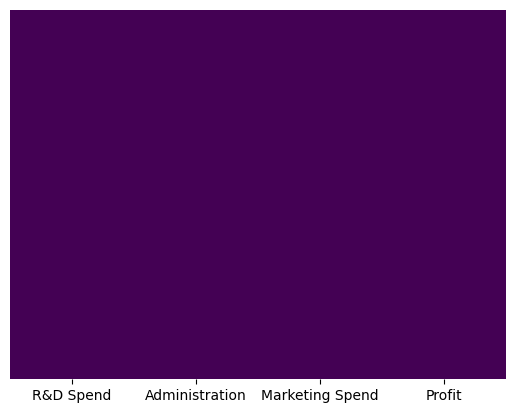

In [92]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [76]:
data[data.duplicated()] # No duplicated data

,R&D Spend,Administration,Marketing Spend,State,Profit


In [77]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [64]:
#Ploting

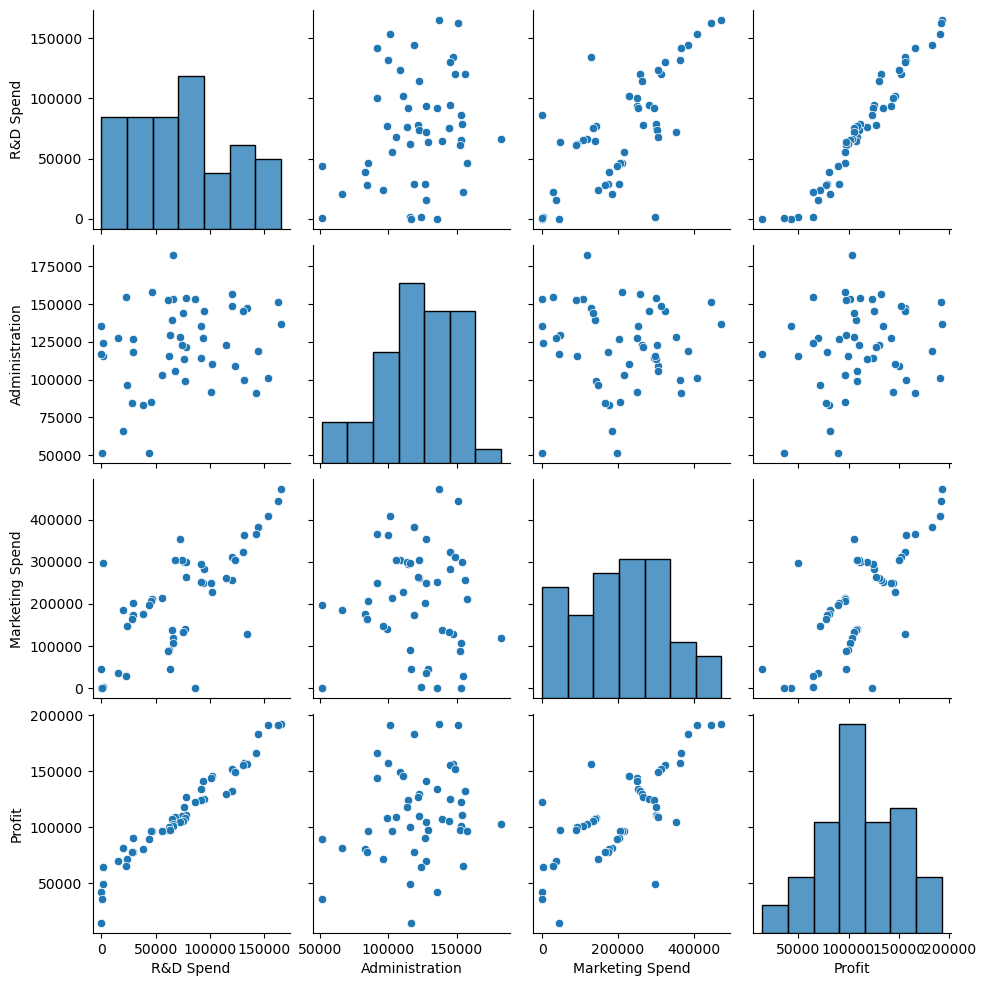

In [84]:
sns.pairplot(data)

### Converting Categorical Features

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [79]:
State=pd.get_dummies(data['State'],drop_first=True)

In [80]:
data.drop(['State'],axis=1,inplace=True)

In [81]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [82]:
data1 = pd.concat([data,State],axis=1)

In [83]:
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [95]:
#Renaming 
data2=data1.rename({'R&D Spend':'RD_Spend','Administration':'Admin','Marketing Spend':'Marketing_Spend','New York':'New_York'},axis=1)
data2

,RD_Spend,Admin,Marketing_Spend,Profit,Florida,New_York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [85]:
data1[data1.duplicated()]

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York


### Building a model

In [98]:
import statsmodels.formula.api as smf
model=smf.ols("Profit~RD_Spend+Admin+Marketing_Spend",data=data2).fit()

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        13:43:08   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Admin              -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
model.params

Intercept          50122.192990
RD_Spend               0.805715
Admin                 -0.026816
Marketing_Spend        0.027228
dtype: float64

In [101]:
#Admin & Marketing_Spend are insignificant

In [103]:
# Building SLR and MLR models for insignificant variables 

In [110]:
SLR_Admin=smf.ols('Profit ~ Admin',data=data2).fit()
SLR_Admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 26 Jul 2023   Prob (F-statistic):              0.162
Time:                        13:52:17   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
SLR_Marketing_Spend=smf.ols('Profit ~ Marketing_Spend',data=data2).fit()
SLR_Marketing_Spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           4.38e-10
Time:                        13:52:33   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
MLR_AM = smf.ols('Profit~Admin+ Marketing_Spend', data=data2).fit()
MLR_AM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           2.50e-10
Time:                        13:53:51   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin               0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Validation

In [116]:
#Collinearty check

In [118]:
rsq_r = smf.ols('RD_Spend~ Admin+Marketing_Spend', data=data2).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols('Admin~RD_Spend+Marketing_Spend', data=data2).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols('Marketing_Spend~RD_Spend+Admin', data=data2).fit().rsquared
vif_m = 1/(1-rsq_m)

d1 = {'Varriables':['RD_Spend','Admin','Marketing_Spend'], 'Vif':[vif_r,vif_a,vif_m]}
vif_df= pd.DataFrame(d1)
vif_df

,Varriables,Vif
0,RD_Spend,2.468903
1,Admin,1.175091
2,Marketing_Spend,2.326773


In [117]:
#Residual analysis

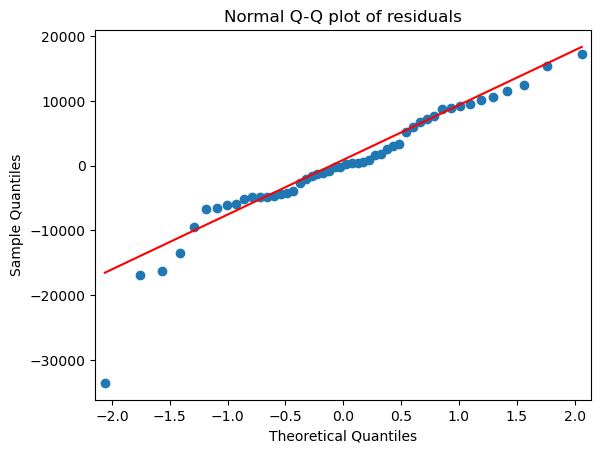

In [119]:
# Q-Q Plot using residual model
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [120]:
#Test for Homoscedasticity or Heteroscedasticity

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  # z = (x-mu)/sigma

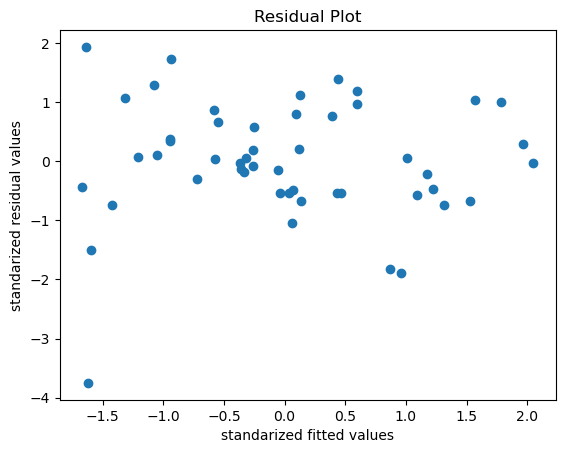

In [121]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residual values')
plt.show()


In [122]:
#Residuals Vs Regressors

eval_env: 1


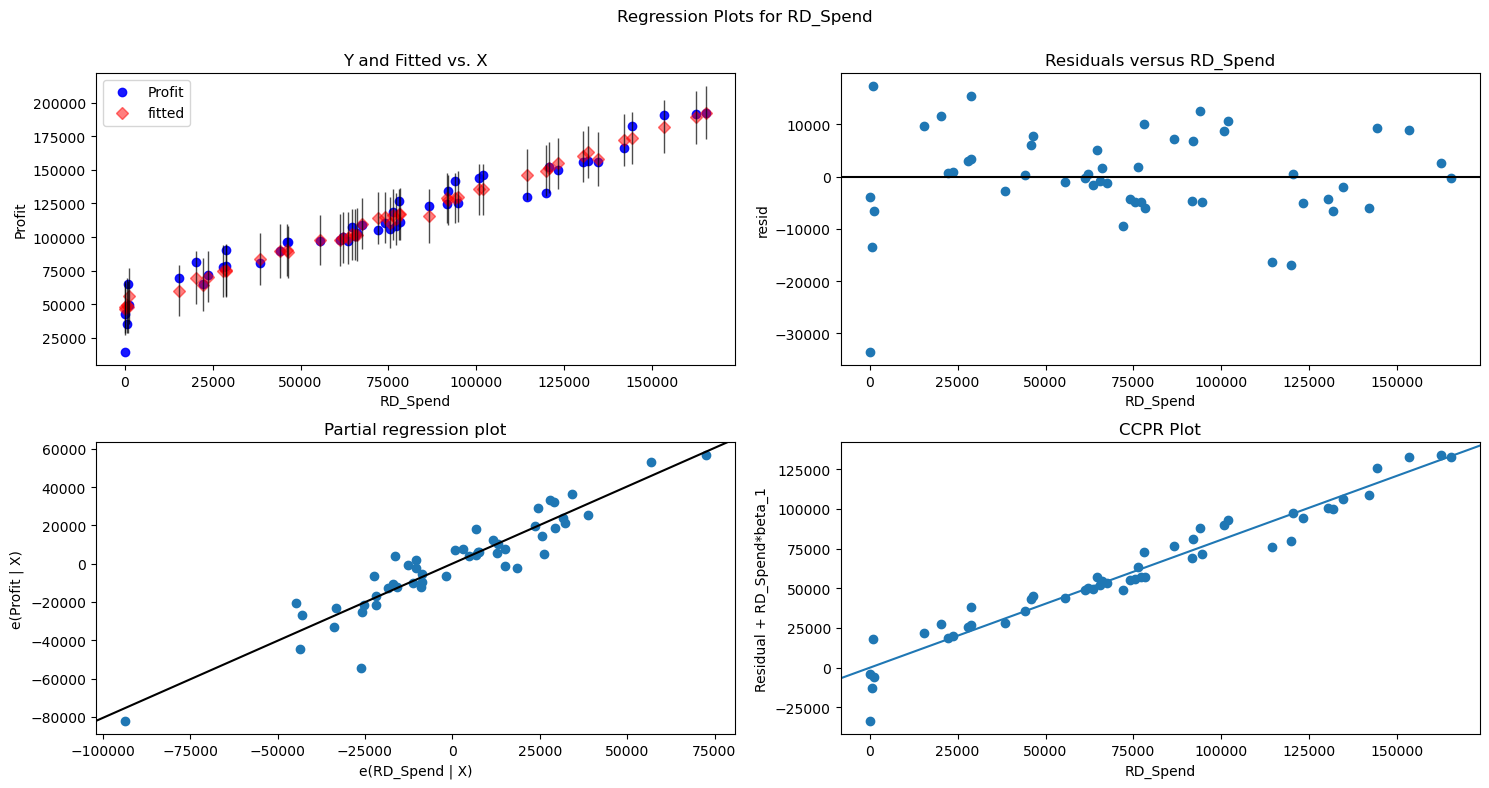

In [123]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD_Spend', fig=fig )
plt.show()

eval_env: 1


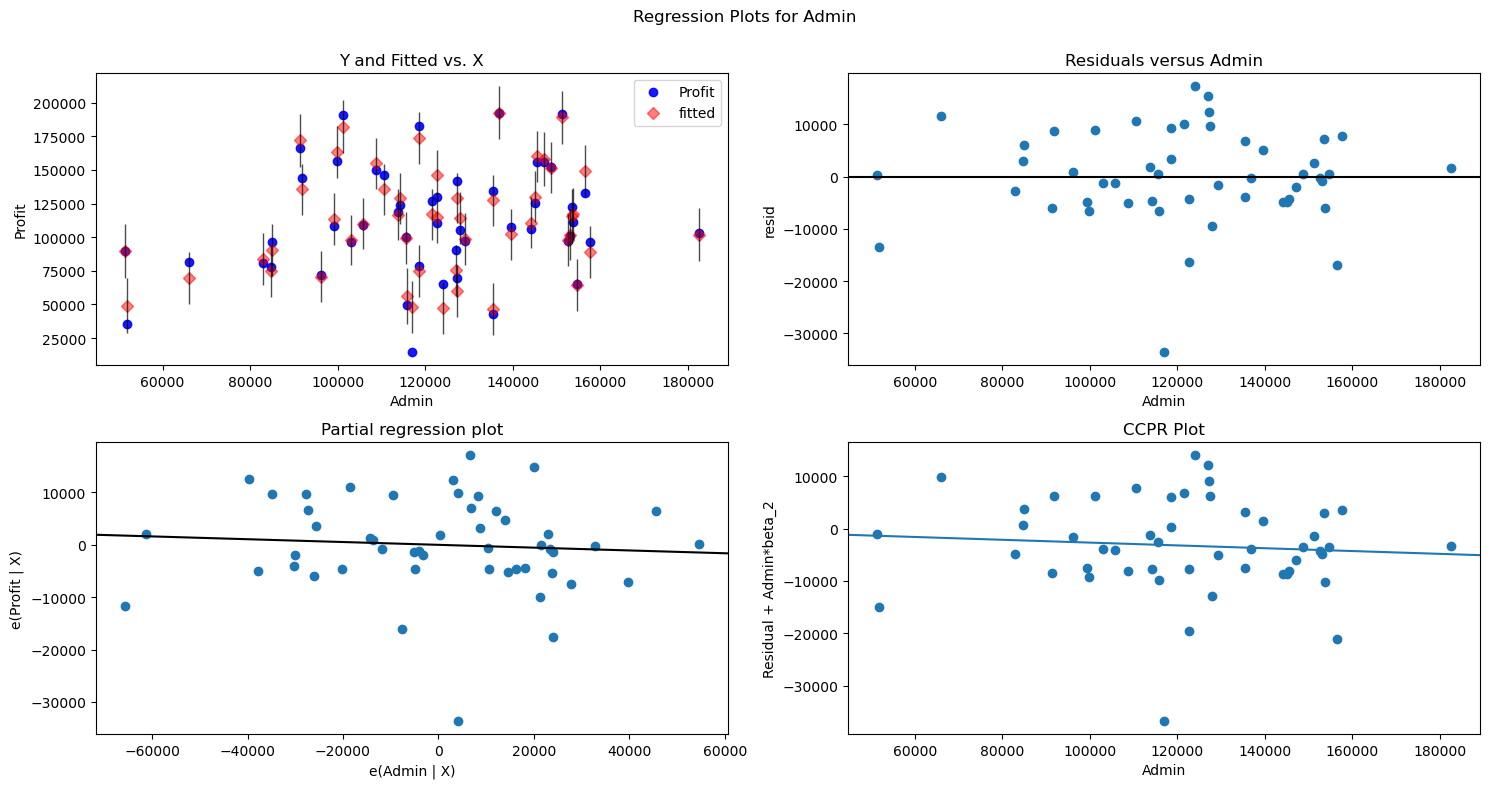

In [124]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Admin', fig=fig )
plt.show()

eval_env: 1


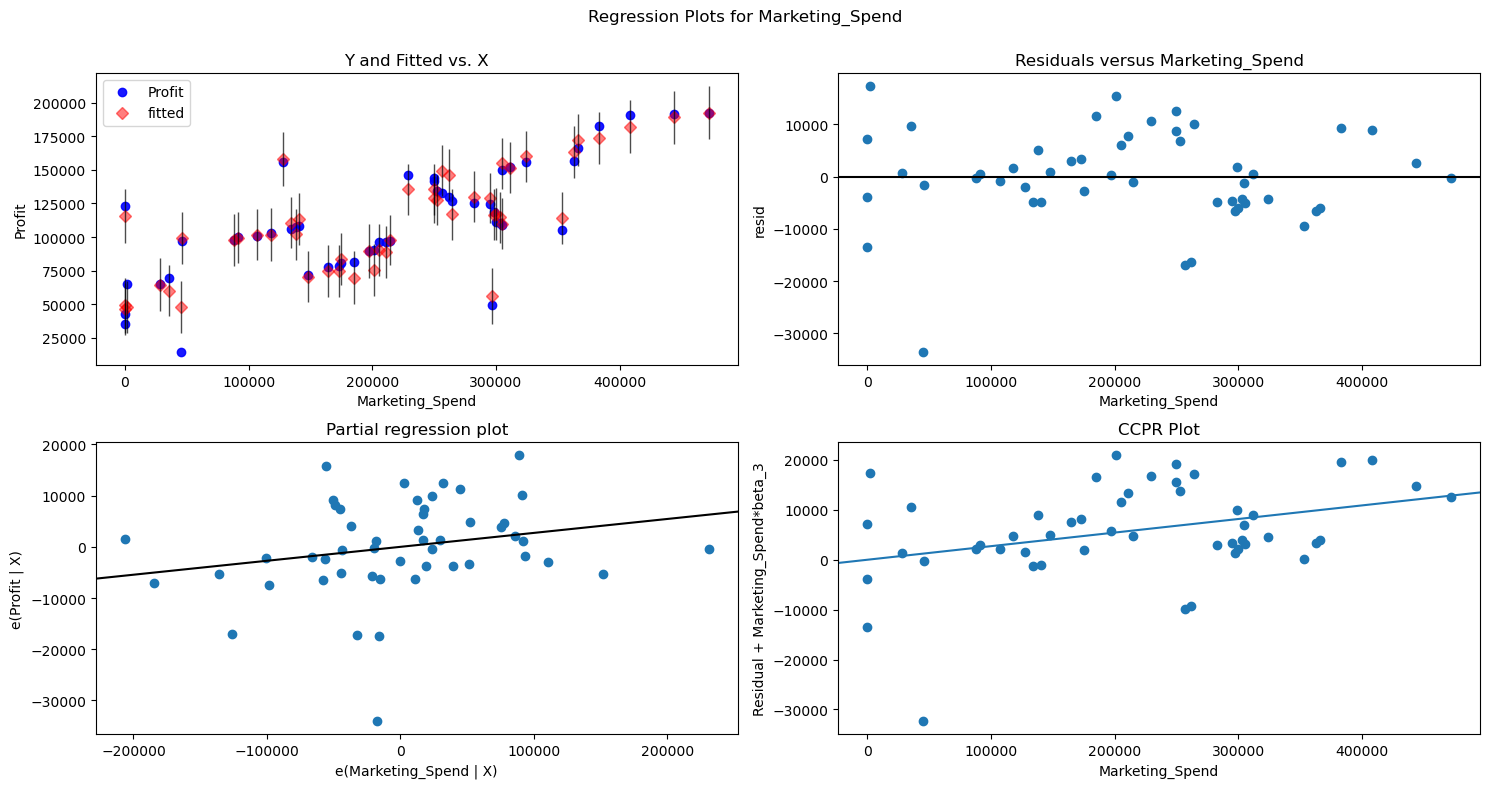

In [125]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Marketing_Spend', fig=fig )
plt.show()

In [126]:
#Detecting Outliers
#Cook's Distance

In [127]:
(c, _)= model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

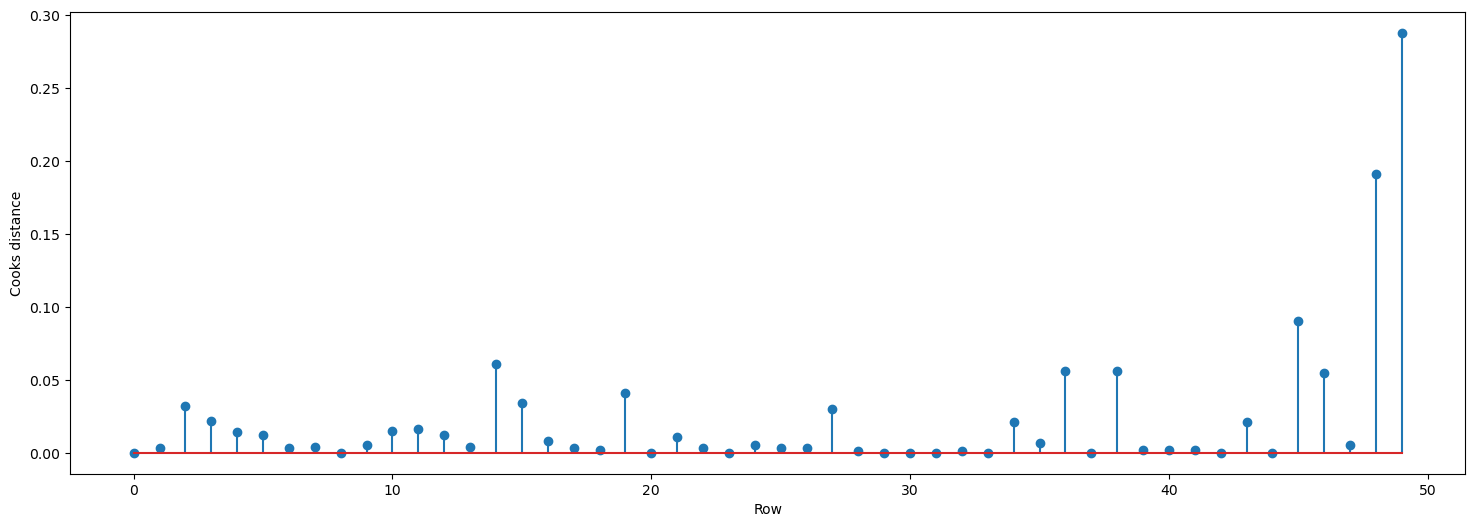

In [128]:
fig = plt.subplots(figsize=(18, 6))
plt.stem(np.arange(len(data2)), np.round(c,3))
plt.xlabel('Row')
plt.ylabel('Cooks distance')
plt.show()
     

In [129]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [ ]:
#Model for improvement

In [133]:
model1=smf.ols('Profit ~RD_Spend+Admin+Marketing_Spend+Florida+New_York',data=data2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.34e-27
Time:                        14:53:47   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
RD_Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Admin              -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
Florida           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
New_York          -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
model2=smf.ols('Profit ~np.sqrt(RD_Spend)+np.sqrt(Admin)+np.sqrt(Marketing_Spend)+np.sqrt(Florida)+np.sqrt(New_York)',data=data2).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     87.39
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.04e-21
Time:                        14:55:51   Log-Likelihood:                -540.87
No. Observations:                  50   AIC:                             1094.
Df Residuals:                      44   BIC:                             1105.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.533e+04   1.65e+04      1.534      0.132   -7954.593    5.86e+04
np.sqrt(RD_Spend)          347.4003     26.145     13.287      0.000     294.708     400.092
np.sqrt(Admin)             -20.9992     46.625     -0.450      0.655    -114.966      72.967
np.sqrt(Marketing_Spend)    15.5819     15.726      0.991      0.327     -16.111      47.275
np.sqrt(Florida)          -787.6709   4597.166     -0.171      0.865   -1.01e+04    8477.309
np.sqrt(New_York)         1546.7914   4451.951      0.347      0.730   -7425.526    1.05e+04
==============================================================================
Omnibus:                        7.897   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.508
Skew:                           0.942   Prob(JB):                       0.0234
Kurtosis:                       3.232   Cond. No.                     5.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
model3=smf.ols('Profit ~RD_Spend+Marketing_Spend+Florida+New_York',data=data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           9.72e-29
Time:                        14:59:43   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.696e+04   3119.471     15.053      0.000    4.07e+04    5.32e+04
RD_Spend            0.7967      0.042     18.771      0.000       0.711       0.882
Marketing_Spend     0.0298      0.016      1.842      0.072      -0.003       0.062
Florida           140.7869   3341.599      0.042      0.967   -6589.538    6871.112
New_York          -19.5234   3229.138     -0.006      0.995   -6523.340    6484.294
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     8.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
r2={'Model_Name':['Model','Model1','Model2','Model3'],'R2':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared]}
r2_table=pd.DataFrame(r2)
r2_table

,Model_Name,R2
0,Model,0.950746
1,Model1,0.950752
2,Model2,0.908514
3,Model3,0.950453
